In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [78]:
df = pd.read_csv('spam.csv', sep = ",")
df.head() # to display first 5 rows of the dataset

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

In [79]:
df

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]

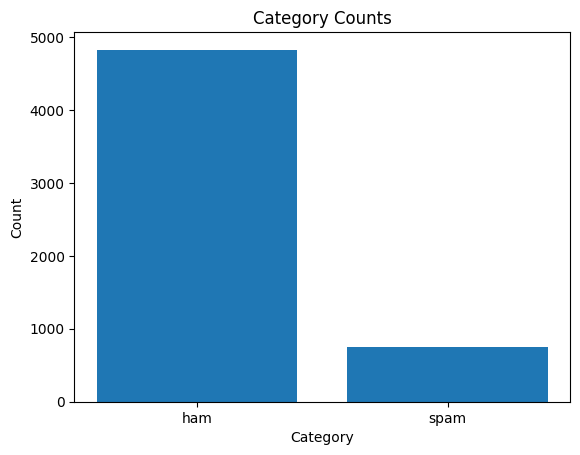

In [80]:
#counting occurences of spam and ham
mycount = df['Category'].value_counts()
plt.bar(mycount.index , mycount.values)
plt.title("Category Counts")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

In [81]:
le = LabelEncoder()

df['Category_enc'] = le.fit_transform(df['Category'])

display(df.tail())

print(df.dtypes)

Category                                            Message  Category_enc
5567     spam  This is the 2nd time we have tried 2 contact u...             1
5568      ham               Will ü b going to esplanade fr home?             0
5569      ham  Pity, * was in mood for that. So...any other s...             0
5570      ham  The guy did some bitching but I acted like i'd...             0
5571      ham                         Rofl. Its true to its name             0

Category        object
Message         object
Category_enc     int32
dtype: object


In [82]:
# Store the number of words in each messages
df['word_count'] = df['Message'].str.split().str.len()


In [83]:
# make it lower case
tokenized_messages = df['Message'].str.lower().str.split(' ')

# Print the tokens to see how it looks like
print(tokenized_messages)

0       [go, until, jurong, point,, crazy.., available...
1                    [ok, lar..., joking, wif, u, oni...]
2       [free, entry, in, 2, a, wkly, comp, to, win, f...
3       [u, dun, say, so, early, hor..., u, c, already...
4       [nah, i, don't, think, he, goes, to, usf,, he,...
                              ...                        
5567    [this, is, the, 2nd, time, we, have, tried, 2,...
5568        [will, ü, b, going, to, esplanade, fr, home?]
5569    [pity,, *, was, in, mood, for, that., so...any...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                    [rofl., its, true, to, its, name]
Name: Message, Length: 5572, dtype: object


In [84]:
tokenized_messages[0]

['go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'cine',
 'there',
 'got',
 'amore',
 'wat...']

In [85]:
# Define a function to returns only alphanumeric tokens
def alpha(tokens):
    """This function removes all non-alphanumeric characters"""
    alpha = []
    for token in tokens:
        new_s = ''.join(c for c in token if c.isalnum())
        alpha.append(new_s)
    return alpha

In [86]:
# Apply our function to tokens
for i in range(len(tokenized_messages)):
    tokenized_messages[i]=alpha(tokenized_messages[i])
# print(tokenized_messages)

In [87]:
df['Message']=tokenized_messages

In [88]:
def to_sentence(tokens):
    s=""
    for token in tokens:
        s=s+" "+token
    return s[1:]

In [89]:
for i in range(len(tokenized_messages)):
    tokenized_messages[i]=to_sentence(tokenized_messages[i])

In [90]:
tokenized_messages

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ü b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Message, Length: 5572, dtype: object

In [91]:
df["Message"]=tokenized_messages

In [92]:
display(df)

Category                                            Message  \
0         ham  go until jurong point crazy available only in ...   
1         ham                            ok lar joking wif u oni   
2        spam  free entry in 2 a wkly comp to win fa cup fina...   
3         ham        u dun say so early hor u c already then say   
4         ham  nah i dont think he goes to usf he lives aroun...   
...       ...                                                ...   
5567     spam  this is the 2nd time we have tried 2 contact u...   
5568      ham                will ü b going to esplanade fr home   
5569      ham  pity  was in mood for that soany other suggest...   
5570      ham  the guy did some bitching but i acted like id ...   
5571      ham                          rofl its true to its name   

      Category_enc  word_count  
0                0          20  
1                0           6  
2                1          28  
3                0          11  
4                0          13  
...            ...         ...  
5567             1          30  
5568             0           8  
5569             0          10  
5570             0          26  
5571             0           6  

[5572 rows x 4 columns]

In [97]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X=df.Message
y=df.Category_enc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = Pipeline([('Vect', CountVectorizer()), ('nb', BernoulliNB())])
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print(confusion_matrix(y_test,y_pred))

Accuracy: 97.48878923766816 %
[[967   1]
 [ 27 120]]


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix

X=df.Message
y=df.Category_enc

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = Pipeline([('Vect', CountVectorizer()), ('nb', MultinomialNB())])
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100, "%")
print(confusion_matrix(y_test,y_pred))

Accuracy: 98.47533632286995 %
[[951   4]
 [ 13 147]]


In [100]:
temp1 = "Hi AyeFaizy, Thanks for signing up for Tome and trusting us with your stories. We’re curious to get your thoughts on how you like Tome and how we can make it better for you.Would you mind taking a few minutes to fill out this survey?Your feedback will help us build a better product so we can deliver as much value as possible for storytellers like you.Thanks,The Tome Team"
temp2 = "An announcement has been added by Junaid Sheikh in the Student Affair, Islamabad site at (http://slate.nu.edu.pk/portal/site/ISBSA) at May 2, 2023 9:13 AM PKT Dear All,We are writing to invite you to join our campaign against bribery which is named as Rishwat Se Inkaar. Bribery is a widespread problem that affects our society and undermines the integrity of our institutions. We are organizing a series of activities aimed at raising awareness about the negative effects of bribery. Also, we will be celebrating Rishwat Se Inkaar day by wearing Black. We would be honored if you would join us in this fight against bribery. Venue: Wisdom TreeDate: May 2nd, 2023 (Tuesday)Timings: 1 pm "
temp3 = "Hi Faizan,you and neuroflash - for one week! This must be celebrated 🎉To properly celebrate our first milestone together, I want to offer you 2 gifts.You are already pretty convinced of neuroflash?👉 Then book a yearly plan now (Basic, Power or Premium) and we'll give you a total of 4 months for free with the coupon code 4freeWRITE 4 MONTHS FOR FREE NOWYou want to test more for now and need more words?👉 Then visit the 🎁 area in your profile and get up to 100,000 bonus words at onceDid you know that in this are you can also invite friends to neuroflash? The best thing about it: If your friend then also creates a neuroflash account, you both receive 10,000 bonus words automatically.GET BONUS WORDS NOWSo, what are you waiting for? Give yourself a present!See you in a few days!The whole team wishes you lots of creativity,Ioana, Julia, Margeret, Michael, Gordian, Kamil, Marcin, Pio, Robert, Stanislav, Wojciech, Jonathan, Jens, Kamil, Henrik, Andrey, Artem, David, Tomasz, Andreea, Pawel, Vanessa and Lasse"
temp4 = "Hi Faizan,We are happy to announce that we have launched our new website. We have added a lot of new features and improved the existing ones. We hope you will like it. Please visit our website and let us know what you think about it. We are looking forward to your feedback.Visit our website: https://www.neuro-flash.com/Best regards,Your neuro-flash team"
temp5 = "Hi Faizan,how was your first experience with your new magic pen? Our goal is that your new magic pen will help you in many ways to make text creation and editing as efficient, creative and inspiring as possible.To give you an idea of which of your daily tasks you can cover with neuroflash and your magic pen, I've put together some training videos to keep your start as simple as possible.👇Write a blog article in just a few minutes (watch video)Product descriptions for your web store (watch video)Instagram caption to match your content (watch video)Generate click-worthy headlines and slogans (watch video)"

for i in range (1,6):
    temp = eval("temp"+str(i))
    temp = temp.lower()
    temp = temp.split(' ')
    temp = alpha(temp)
    temp = to_sentence(temp)
    print(temp)
    print(model.predict([temp]))

['hi', 'ayefaizy', 'thanks', 'for', 'signing', 'up', 'for', 'tome', 'and', 'trusting', 'us', 'with', 'your', 'stories', 'were', 'curious', 'to', 'get', 'your', 'thoughts', 'on', 'how', 'you', 'like', 'tome', 'and', 'how', 'we', 'can', 'make', 'it', 'better', 'for', 'youwould', 'you', 'mind', 'taking', 'a', 'few', 'minutes', 'to', 'fill', 'out', 'this', 'surveyyour', 'feedback', 'will', 'help', 'us', 'build', 'a', 'better', 'product', 'so', 'we', 'can', 'deliver', 'as', 'much', 'value', 'as', 'possible', 'for', 'storytellers', 'like', 'youthanksthe', 'tome', 'team']


AttributeError: 'list' object has no attribute 'lower'